# VERZEO MACHINE LEARNING AUGUST MINOR PROJECT
# TITLE :- REAL ESTATE PRICE PREDICTION
### NAME :- YARRU LAKSHMI SAI KRISHNA
### EMAIL ID :- yarrulakshmisai111@gmail.com

# Loading data

### import all required packages like numpy, pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the dataset

In [2]:
data=pd.read_csv(r"C:\Users\LAKSHMI SAI KRISHNA\Desktop\verzeo project\Real estate.csv",encoding="latin-1")

In [3]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# Data cleaning

### "No" column seems to be useless since we already have index, so remove that column

In [4]:
data=data.drop(labels="No",axis=1)

### column names are difficult to read, so let us rename the columns for convinience

In [5]:
columns=data.columns.tolist()

In [6]:
columns

['X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [7]:
columns=['date',
 'age',
 'distance to station',
 'no of stores',
 'lat',
 'long',
 'price']

In [8]:
data.columns=columns

### now data looks like

In [9]:
data.head()

,date,age,distance to station,no of stores,lat,long,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### initial observations:-
1. there are 7 columns out of which 6 are input variables and one is output variable i.e price
2. no column seems to be useless at initial glance
3. in date column the value after after point is redundant
4. no of stores is discrete

In [10]:
data.shape

(414, 7)

In [11]:
data.dtypes

date                   float64
age                    float64
distance to station    float64
no of stores             int64
lat                    float64
long                   float64
price                  float64
dtype: object

### remove the characters after dot in the date column

In [12]:
data['date']=data['date'].astype(str).str[:4].astype('int64')

In [13]:
data.head()

,date,age,distance to station,no of stores,lat,long,price
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


### check for any duplicated rows

In [14]:
data.duplicated().value_counts()

False    414
dtype: int64

### no duplicate rows

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 414 non-null    int64  
 1   age                  414 non-null    float64
 2   distance to station  414 non-null    float64
 3   no of stores         414 non-null    int64  
 4   lat                  414 non-null    float64
 5   long                 414 non-null    float64
 6   price                414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


### get some statistical info regarding all columns

In [16]:
data.describe()

,date,age,distance to station,no of stores,lat,long,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


**statistical observations**
1. date has only two values 2012 and 2013
2. age is varying between 0 and 43.8
3. distance from station is varying in between 23.38 and 6488
4. no of stores is discrete and varies from 0 to 10
5. lat and long vary mostly in decimal parts
6. price is varing in between 7.6 and 117.5

In [17]:
data['date'].unique()

array([2012, 2013], dtype=int64)

In [18]:
data['date'].nunique()

2

In [19]:
data['no of stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [20]:
data['no of stores'].nunique()

11

In [21]:
data['lat'].nunique()

234

In [22]:
data['long'].nunique()

232

### copy data into data 1 so as to not disturb original data

In [23]:
data1=data.copy()

### assign 2012 with 0 and 2013 with 1 in  date column

In [24]:
data1['date']=data1['date'].map({2012:0,2013:1})

In [25]:
data1.head()

,date,age,distance to station,no of stores,lat,long,price
0,0,32.0,84.87882,10,24.98298,121.54024,37.9
1,0,19.5,306.59470,9,24.98034,121.53951,42.2
2,1,13.3,561.98450,5,24.98746,121.54391,47.3
3,1,13.3,561.98450,5,24.98746,121.54391,54.8
4,0,5.0,390.56840,5,24.97937,121.54245,43.1


### check mean of all columns

In [26]:
data1.mean()

date                      0.695652
age                      17.712560
distance to station    1083.885689
no of stores              4.094203
lat                      24.969030
long                    121.533361
price                    37.980193
dtype: float64

### check correlation or heat map to find any heavily correlated variable pairs

In [27]:
data1.corr()

,date,age,distance to station,no of stores,lat,long,price
date,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545
age,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to station,0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
no of stores,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
lat,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
long,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


**observation:-**
1. only distance to station and longitude have high negative correlation of -0.8 but it is not high enough to remove one of them

# DATA VISUALIZATION

### using seaborn plot all the graph between all pairs of variables

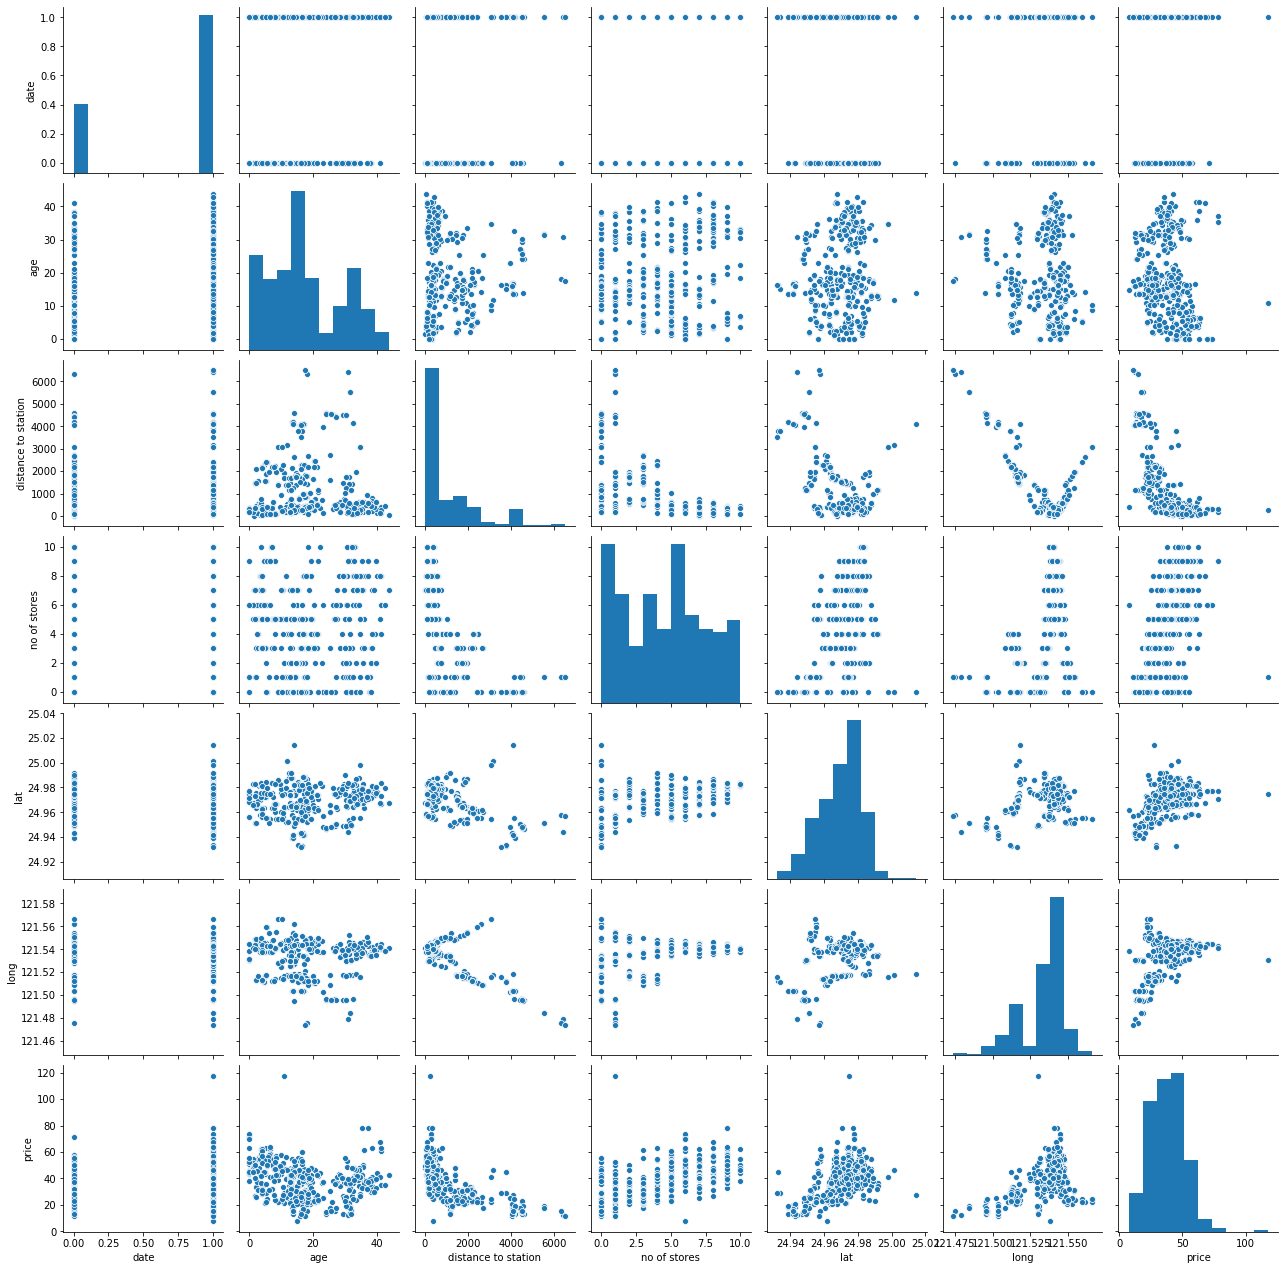

In [29]:
sns.pairplot(data1)

### distance to station and long are highly correlated, so first we see the plot between them

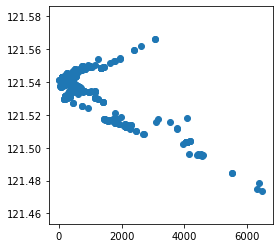

In [30]:
fig=plt.figure(figsize=(4,4))
plt.scatter(data1['distance to station'],data.long)

## Univariate analysis

**Let us analyse each variable individually graphically**

## histograms for discrete variables

(array([58., 43., 49., 97., 44., 10., 27., 50., 25., 11.]),
 array([ 0.  ,  4.38,  8.76, 13.14, 17.52, 21.9 , 26.28, 30.66, 35.04,
        39.42, 43.8 ]),
 <a list of 10 Patch objects>)

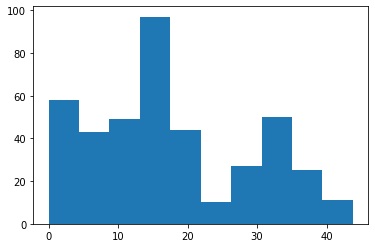

In [31]:
plt.hist(data1.age)

(array([251.,  42.,  47.,  30.,   7.,   3.,  27.,   2.,   2.,   3.]),
 array([  23.38284 ,  669.846656, 1316.310472, 1962.774288, 2609.238104,
        3255.70192 , 3902.165736, 4548.629552, 5195.093368, 5841.557184,
        6488.021   ]),
 <a list of 10 Patch objects>)

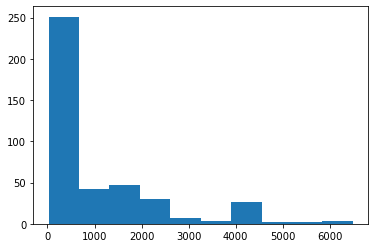

In [32]:
plt.hist(data1['distance to station'])

(array([67., 46., 24., 46., 31., 67., 37., 31., 30., 35.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

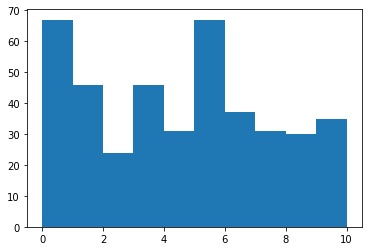

In [33]:
plt.hist(data['no of stores'])

(array([  6.,  20.,  48.,  63.,  91., 125.,  53.,   6.,   1.,   1.]),
 array([24.93207 , 24.940322, 24.948574, 24.956826, 24.965078, 24.97333 ,
        24.981582, 24.989834, 24.998086, 25.006338, 25.01459 ]),
 <a list of 10 Patch objects>)

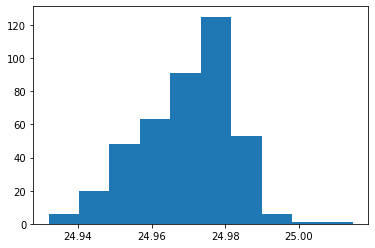

In [34]:
plt.hist(data1['lat'])

(array([  3.,   2.,  10.,  22.,  57.,  10., 101., 175.,  29.,   5.]),
 array([121.47353 , 121.482804, 121.492078, 121.501352, 121.510626,
        121.5199  , 121.529174, 121.538448, 121.547722, 121.556996,
        121.56627 ]),
 <a list of 10 Patch objects>)

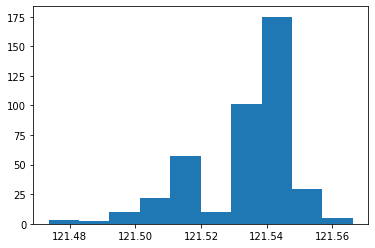

In [35]:
plt.hist(data1['long'])

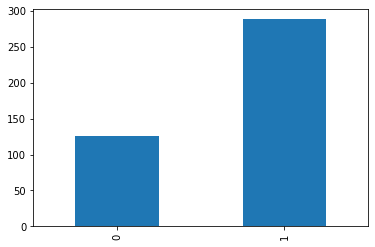

In [36]:
data1.date.value_counts().sort_index().plot.bar()

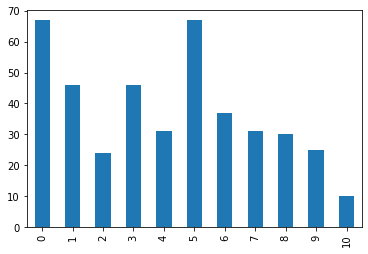

In [37]:
data['no of stores'].value_counts().sort_index().plot.bar()

## Boxplots for continuous variables

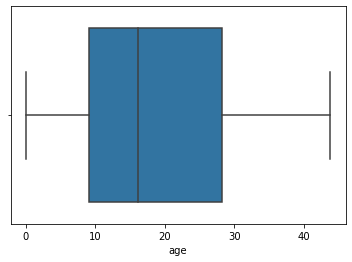

In [38]:
sns.boxplot(data1['age'])

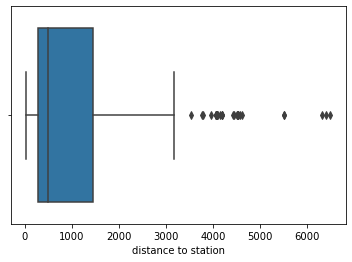

In [39]:
sns.boxplot(data1['distance to station'])

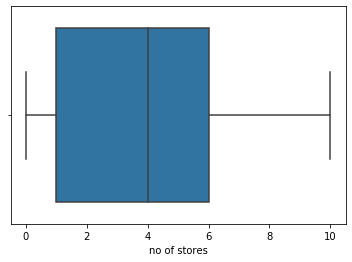

In [40]:
sns.boxplot(data1['no of stores'])

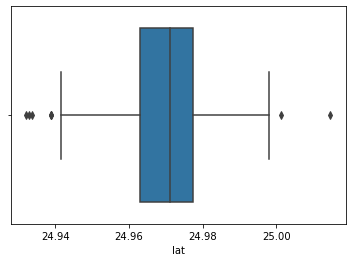

In [41]:
sns.boxplot(data1['lat'])

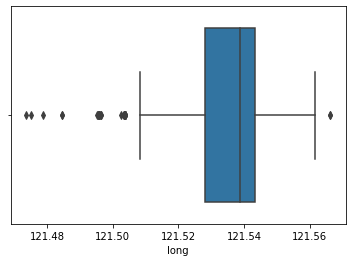

In [42]:
sns.boxplot(data1['long'])

### from these box plots it is clear that there are outliers in the data, where will remove outliers at the end

## Multivariate analysis

**Let us analyse the relationship between different pairs of variables**

**use box plots for discrete vs continuous**

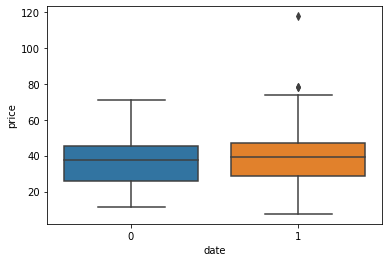

In [43]:
sns.boxplot(x='date',y='price',data=data1)

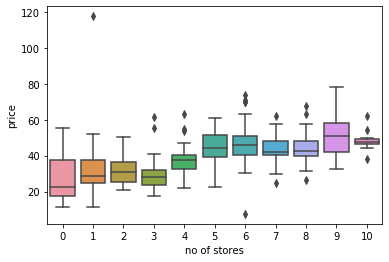

In [44]:
sns.boxplot(x='no of stores',y='price',data=data1)

**use scatterplots for continuous vs continuous**

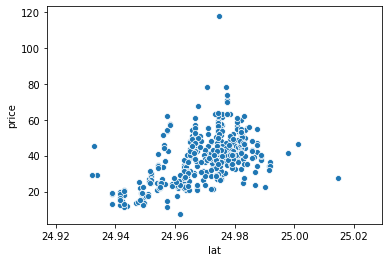

In [45]:
sns.scatterplot(x='lat',y='price',data=data1)

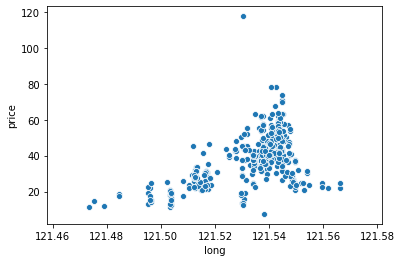

In [46]:
sns.scatterplot(x='long',y='price',data=data1)

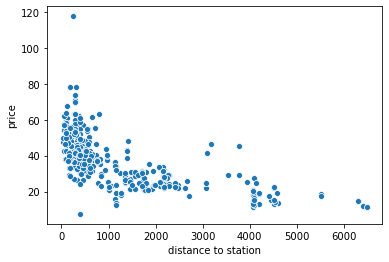

In [47]:
sns.scatterplot(x='distance to station',y='price',data=data1)

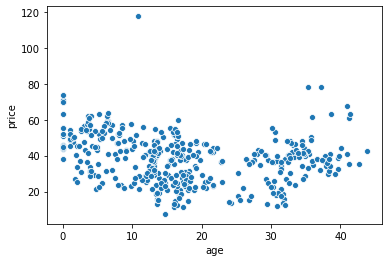

In [48]:
sns.scatterplot(x='age',y='price',data=data1)

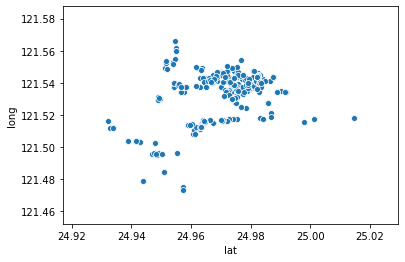

In [49]:
sns.scatterplot(x='lat',y='long',data=data1)

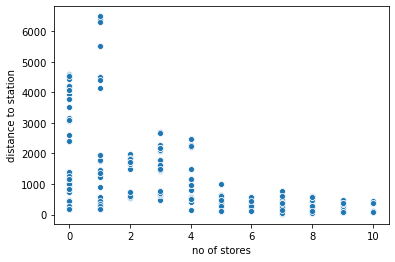

In [50]:
sns.scatterplot(y='distance to station',x='no of stores',data=data1)

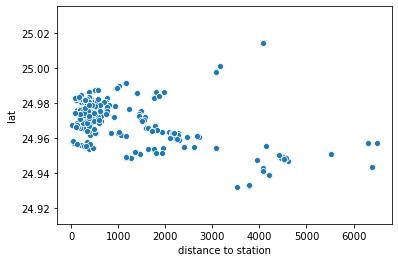

In [51]:
sns.scatterplot(x='distance to station',y='lat',data=data1)

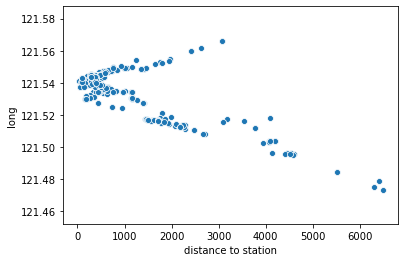

In [52]:
sns.scatterplot(x='distance to station',y='long',data=data1)

In [53]:
data1.head()

,date,age,distance to station,no of stores,lat,long,price
0,0,32.0,84.87882,10,24.98298,121.54024,37.9
1,0,19.5,306.59470,9,24.98034,121.53951,42.2
2,1,13.3,561.98450,5,24.98746,121.54391,47.3
3,1,13.3,561.98450,5,24.98746,121.54391,54.8
4,0,5.0,390.56840,5,24.97937,121.54245,43.1


In [54]:
data1.dtypes

date                     int64
age                    float64
distance to station    float64
no of stores             int64
lat                    float64
long                   float64
price                  float64
dtype: object

# remove outliers

**to remove outliers we calculate quantiles in the range of 0.15 and 0.85 so as to not to remove too many rows**

In [55]:
q1= data1.quantile(0.15)
q3= data1.quantile(0.85)
iqr=q3-q1
iqr

date                      1.000000
age                      27.710000
distance to station    1987.583400
no of stores              8.000000
lat                       0.026568
long                      0.030245
price                    28.505000
dtype: float64

In [56]:
data2=data1[~((data1<(q1-1.5*iqr))|(data1>(q3+1.5*iqr)))]

In [57]:
data2.isna().sum()

date                   0
age                    0
distance to station    5
no of stores           0
lat                    0
long                   0
price                  1
dtype: int64

**remove all 6 the rows having atleast one false**

In [58]:
data2=data2.dropna()

In [59]:
data2.shape

(408, 7)

In [60]:
data2.dtypes

date                     int64
age                    float64
distance to station    float64
no of stores             int64
lat                    float64
long                   float64
price                  float64
dtype: object

## no of stores is categorical and hence cannot be used directly, we create dummy variables for each value of no stores

In [61]:
data2['no of stores']=data2['no of stores'].astype('category')

In [62]:
data2=pd.get_dummies(data2)

In [63]:
data2

,date,age,distance to station,lat,long,price,no of stores_0,no of stores_1,no of stores_2,no of stores_3,no of stores_4,no of stores_5,no of stores_6,no of stores_7,no of stores_8,no of stores_9,no of stores_10
0,0,32.0,84.87882,24.98298,121.54024,37.9,0,0,0,0,0,0,0,0,0,0,1
1,0,19.5,306.59470,24.98034,121.53951,42.2,0,0,0,0,0,0,0,0,0,1,0
2,1,13.3,561.98450,24.98746,121.54391,47.3,0,0,0,0,0,1,0,0,0,0,0
3,1,13.3,561.98450,24.98746,121.54391,54.8,0,0,0,0,0,1,0,0,0,0,0
4,0,5.0,390.56840,24.97937,121.54245,43.1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1,13.7,4082.01500,24.94155,121.50381,15.4,1,0,0,0,0,0,0,0,0,0,0
410,0,5.6,90.45606,24.97433,121.54310,50.0,0,0,0,0,0,0,0,0,0,1,0
411,1,18.8,390.96960,24.97923,121.53986,40.6,0,0,0,0,0,0,0,1,0,0,0
412,1,8.1,104.81010,24.96674,121.54067,52.5,0,0,0,0,0,1,0,0,0,0,0


# Normalization

**import standard scaler from sklearn preprocesing library**

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()

## do normalization for continuous variables only

In [66]:
data3=data2[['age','distance to station','lat','long']]

In [67]:
data3.head()

,age,distance to station,lat,long
0,32.0,84.87882,24.98298,121.54024
1,19.5,306.59470,24.98034,121.53951
2,13.3,561.98450,24.98746,121.54391
3,13.3,561.98450,24.98746,121.54391
4,5.0,390.56840,24.97937,121.54245


In [68]:
data3=scaler.fit_transform(data3)

In [69]:
data2[['age','distance to station','lat','long']]=data3

## finally data looks like

In [70]:
data2

,date,age,distance to station,lat,long,price,no of stores_0,no of stores_1,no of stores_2,no of stores_3,no of stores_4,no of stores_5,no of stores_6,no of stores_7,no of stores_8,no of stores_9,no of stores_10
0,0,1.260973,-0.823539,1.115926,0.436996,37.9,0,0,0,0,0,0,0,0,0,0,1
1,0,0.164157,-0.629349,0.901754,0.385624,42.2,0,0,0,0,0,0,0,0,0,1,0
2,1,-0.379864,-0.405665,1.479368,0.695265,47.3,0,0,0,0,0,1,0,0,0,0,0
3,1,-0.379864,-0.405665,1.479368,0.695265,54.8,0,0,0,0,0,1,0,0,0,0,0
4,0,-1.108150,-0.555800,0.823062,0.592521,43.1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1,-0.344766,2.677359,-2.245106,-2.126687,15.4,1,0,0,0,0,0,0,0,0,0,0
410,0,-1.055503,-0.818654,0.414190,0.638263,50.0,0,0,0,0,0,0,0,0,0,1,0
411,1,0.102735,-0.555449,0.811705,0.410255,40.6,0,0,0,0,0,0,0,1,0,0,0
412,1,-0.836139,-0.806082,-0.201553,0.467257,52.5,0,0,0,0,0,1,0,0,0,0,0


# Model fitting

## 1) Linear regression

In [71]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [72]:
from sklearn.preprocessing import PolynomialFeatures

### spltting data into train set and test set

In [73]:
x=data2.drop(labels='price',axis=1)

In [74]:
y=data2['price']

In [75]:
xtr,xts,ytr,yts= train_test_split(x,y,test_size=0.3,random_state=0)

In [76]:
xtr.shape

(285, 16)

In [77]:
xts.shape

(123, 16)

In [78]:
ytr.shape

(285,)

In [79]:
yts.shape

(123,)

### fitting model

In [80]:
reg = LinearRegression().fit(xtr, ytr)

In [81]:
ytrp=pd.DataFrame(reg.predict(xtr),columns=['price'])

In [82]:
ytsp=pd.DataFrame(reg.predict(xts),columns=['price'])

### evaluation of model using metrics

In [83]:
from sklearn import metrics

In [84]:
metrics.r2_score(ytr,ytrp)

0.663807744083677

In [85]:
metrics.r2_score(yts,ytsp)

0.5787680333307688

### r2 score is equivalent to accuracy or score of model
### considering we are using linear regression with very less correlated features, this score is good enough
### we shall check other metrics like maximum and minimum error, mean squared error, mean absolute error, variance, poisson deviance etc

In [86]:
metrics.max_error(ytr,ytrp)

36.28734202152948

In [87]:
metrics.max_error(yts,ytsp)

30.14144819912223

In [88]:
metrics.mean_squared_error(ytr,ytrp)

57.196886878970574

In [89]:
metrics.mean_squared_error(yts,ytsp)

64.69025950603294

In [90]:
metrics.mean_absolute_error(ytr,ytrp)

5.449118049805884

In [91]:
metrics.mean_absolute_error(yts,ytsp)

5.5643066905301195

In [92]:
metrics.explained_variance_score(ytr,ytrp)

0.6638077440836772

In [93]:
metrics.explained_variance_score(yts,ytsp)

0.5788102411340992

In [94]:
metrics.mean_poisson_deviance(ytr,ytrp)

1.5480482803356752

In [95]:
metrics.mean_poisson_deviance(yts,ytsp)

1.7004220314211125

In [96]:
sklearn.model_selection.cross_val_score(reg,x,y)

array([0.66313478, 0.53425067, 0.71962891, 0.57061278, 0.55744377])

## 2) polynomial regression

### since we did not obtain high accuracy with linear regression , let us introduce polynomial features into data set and then apply linear regression

In [97]:
a=x
b=y

In [98]:
a.shape

(408, 16)

In [99]:
a.head()

,date,age,distance to station,lat,long,no of stores_0,no of stores_1,no of stores_2,no of stores_3,no of stores_4,no of stores_5,no of stores_6,no of stores_7,no of stores_8,no of stores_9,no of stores_10
0,0,1.260973,-0.823539,1.115926,0.436996,0,0,0,0,0,0,0,0,0,0,1
1,0,0.164157,-0.629349,0.901754,0.385624,0,0,0,0,0,0,0,0,0,1,0
2,1,-0.379864,-0.405665,1.479368,0.695265,0,0,0,0,0,1,0,0,0,0,0
3,1,-0.379864,-0.405665,1.479368,0.695265,0,0,0,0,0,1,0,0,0,0,0
4,0,-1.108150,-0.555800,0.823062,0.592521,0,0,0,0,0,1,0,0,0,0,0


In [100]:
poly=PolynomialFeatures(degree=3)

### obtain polynomial features of upto degree 3

In [109]:
poly.fit_transform(a[['age','distance to station','lat','long']])

array([[ 1.        ,  1.2609728 , -0.82353873, ...,  0.54418746,
         0.2131038 ,  0.08345144],
       [ 1.        ,  0.1641568 , -0.62934853, ...,  0.31357455,
         0.13409636,  0.05734469],
       [ 1.        , -0.37986394, -0.40566499, ...,  1.52160825,
         0.71511663,  0.33608637],
       ...,
       [ 1.        ,  0.1027351 , -0.55544865, ...,  0.27030247,
         0.13661724,  0.06904958],
       [ 1.        , -0.8361394 , -0.80608188, ...,  0.01898171,
        -0.04400491,  0.10201569],
       [ 1.        , -0.97653185, -0.81865389, ...,  0.10949597,
         0.16873239,  0.26001521]])

In [110]:
c=poly.fit_transform(a[['age','distance to station','lat','long']])

In [111]:
c=pd.DataFrame(c)

In [112]:
c

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,1.260973,-0.823539,1.115926,0.436996,1.590052,-1.038460,1.407152,0.551041,0.678216,...,-0.558537,0.756839,0.296378,-1.025545,-0.401603,-0.157268,1.389651,0.544187,0.213104,0.083451
1,1.0,0.164157,-0.629349,0.901754,0.385624,0.026947,-0.103312,0.148029,0.063303,0.396080,...,-0.249272,0.357166,0.152738,-0.511762,-0.218849,-0.093588,0.733271,0.313575,0.134096,0.057345
2,1.0,-0.379864,-0.405665,1.479368,0.695265,0.144297,0.154098,-0.561959,-0.264106,0.164564,...,-0.066758,0.243451,0.114416,-0.887810,-0.417248,-0.196096,3.237642,1.521608,0.715117,0.336086
3,1.0,-0.379864,-0.405665,1.479368,0.695265,0.144297,0.154098,-0.561959,-0.264106,0.164564,...,-0.066758,0.243451,0.114416,-0.887810,-0.417248,-0.196096,3.237642,1.521608,0.715117,0.336086
4,1.0,-1.108150,-0.555800,0.823062,0.592521,1.227996,0.615910,-0.912076,-0.656601,0.308914,...,-0.171694,0.254255,0.183038,-0.376517,-0.271053,-0.195131,0.557569,0.401392,0.288961,0.208022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1.0,-0.344766,2.677359,-2.245106,-2.126687,0.118863,-0.923062,0.774036,0.733209,7.168252,...,19.191985,-16.093485,-15.244627,13.495230,12.783418,12.109151,-11.316458,-10.719566,-10.154158,-9.618573
404,1.0,-1.055503,-0.818654,0.414190,0.638263,1.114086,0.864091,-0.437178,-0.673688,0.670194,...,-0.548657,0.277588,0.427760,-0.140443,-0.216421,-0.333503,0.071056,0.109496,0.168732,0.260015
405,1.0,0.102735,-0.555449,0.811705,0.410255,0.010555,-0.057064,0.083391,0.042148,0.308523,...,-0.171369,0.250430,0.126573,-0.365966,-0.184968,-0.093487,0.534804,0.270302,0.136617,0.069050
406,1.0,-0.836139,-0.806082,-0.201553,0.467257,0.699129,0.673997,0.168527,-0.390692,0.649768,...,-0.523766,-0.130963,0.303609,-0.032746,0.075914,-0.175991,-0.008188,0.018982,-0.044005,0.102016


In [113]:
c.shape

(408, 35)

In [114]:
d=a.drop(labels=['age','distance to station','lat','long'],axis=1)

In [115]:
d

,date,no of stores_0,no of stores_1,no of stores_2,no of stores_3,no of stores_4,no of stores_5,no of stores_6,no of stores_7,no of stores_8,no of stores_9,no of stores_10
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1,1,0,0,0,0,0,0,0,0,0,0
410,0,0,0,0,0,0,0,0,0,0,1,0
411,1,0,0,0,0,0,0,0,1,0,0,0
412,1,0,0,0,0,0,1,0,0,0,0,0


In [116]:
d.shape

(408, 12)

In [117]:
d=d.reset_index().drop(labels='index',axis=1)

In [118]:
e=pd.concat([d,c],axis=1)

In [119]:
e

,date,no of stores_0,no of stores_1,no of stores_2,no of stores_3,no of stores_4,no of stores_5,no of stores_6,no of stores_7,no of stores_8,...,25,26,27,28,29,30,31,32,33,34
0,0,0,0,0,0,0,0,0,0,0,...,-0.558537,0.756839,0.296378,-1.025545,-0.401603,-0.157268,1.389651,0.544187,0.213104,0.083451
1,0,0,0,0,0,0,0,0,0,0,...,-0.249272,0.357166,0.152738,-0.511762,-0.218849,-0.093588,0.733271,0.313575,0.134096,0.057345
2,1,0,0,0,0,0,1,0,0,0,...,-0.066758,0.243451,0.114416,-0.887810,-0.417248,-0.196096,3.237642,1.521608,0.715117,0.336086
3,1,0,0,0,0,0,1,0,0,0,...,-0.066758,0.243451,0.114416,-0.887810,-0.417248,-0.196096,3.237642,1.521608,0.715117,0.336086
4,0,0,0,0,0,0,1,0,0,0,...,-0.171694,0.254255,0.183038,-0.376517,-0.271053,-0.195131,0.557569,0.401392,0.288961,0.208022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1,1,0,0,0,0,0,0,0,0,...,19.191985,-16.093485,-15.244627,13.495230,12.783418,12.109151,-11.316458,-10.719566,-10.154158,-9.618573
404,0,0,0,0,0,0,0,0,0,0,...,-0.548657,0.277588,0.427760,-0.140443,-0.216421,-0.333503,0.071056,0.109496,0.168732,0.260015
405,1,0,0,0,0,0,0,0,1,0,...,-0.171369,0.250430,0.126573,-0.365966,-0.184968,-0.093487,0.534804,0.270302,0.136617,0.069050
406,1,0,0,0,0,0,1,0,0,0,...,-0.523766,-0.130963,0.303609,-0.032746,0.075914,-0.175991,-0.008188,0.018982,-0.044005,0.102016


In [120]:
b=b.reset_index()

In [121]:
b=b.drop(labels=['index'],axis=1)

In [122]:
xtr,xts,ytr,yts= train_test_split(e,b,test_size=0.3,random_state=0)

In [123]:
xtr.shape

(285, 47)

In [124]:
ytr.shape

(285, 1)

In [125]:
xts.shape

(123, 47)

In [126]:
yts.shape

(123, 1)

## model fitting

In [128]:
reg = LinearRegression().fit(xtr, ytr)

In [129]:
ytrp=pd.DataFrame(reg.predict(xtr),columns=['price'])

In [130]:
ytsp=pd.DataFrame(reg.predict(xts),columns=['price'])

In [131]:
metrics.r2_score(ytr,ytrp)

0.8102426442657422

In [132]:
metrics.r2_score(yts,ytsp)

0.6993642111019018

### we can see that r2 score had substantially increased for both train an test data

# THANK YOU

### NAME :- YARRU LAKSHMI SAI KRISHNA
### EMAIL ID :- yarrulakshmisai111@gmail.com